###### csv 파일 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('train.csv')
df = df.drop(['index', 'country', 'introelapse', 'testelapse', 'surveyelapse'], axis=1)

In [ ]:
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD', 'nerdiness'],
      dtype='object')

In [ ]:
Q_columns = ['Q' + str(i) for i in range(1, 27)]
TIPI_columns = ['TIPI' + str(i) for i in range(1, 11)]
VCL_columns = ['VCL' + str(i) for i in range(1, 17)]
info_columns = ['education', 'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation', 'voted', 'married', 'familysize', 'ASD']

###### VCL 응답 Count

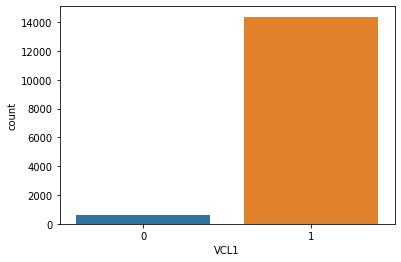

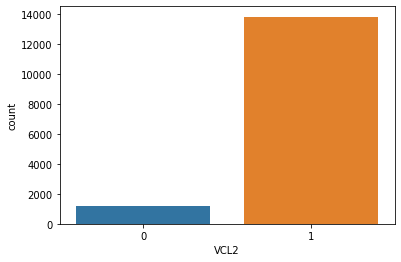

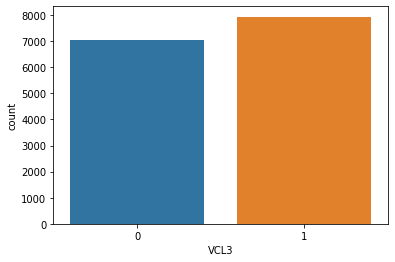

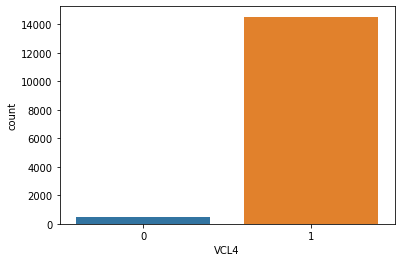

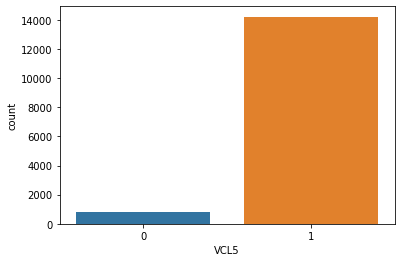

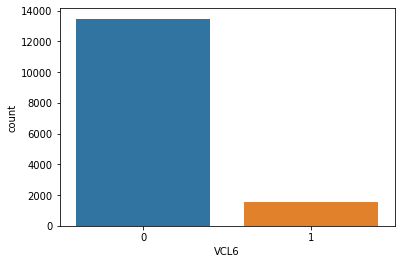

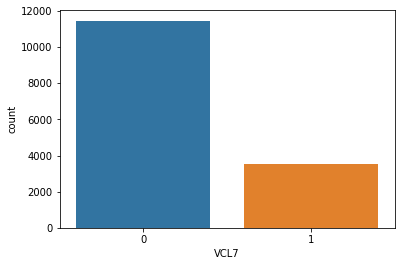

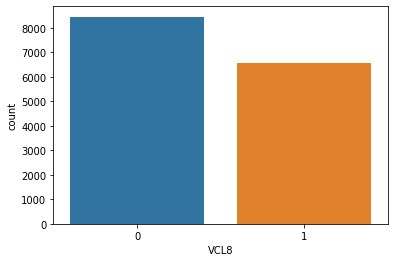

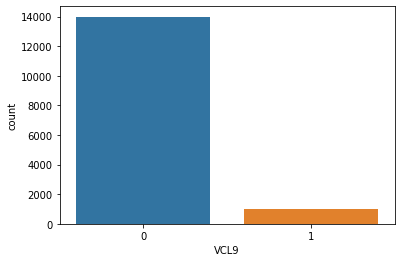

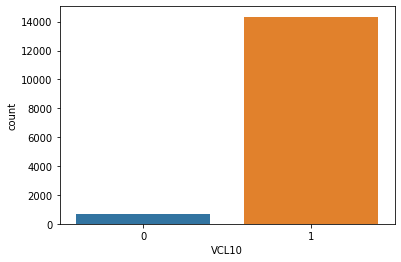

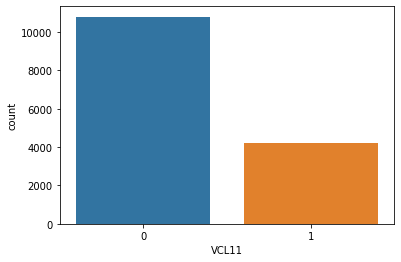

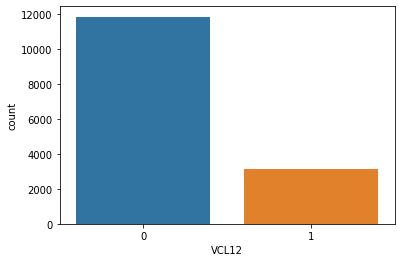

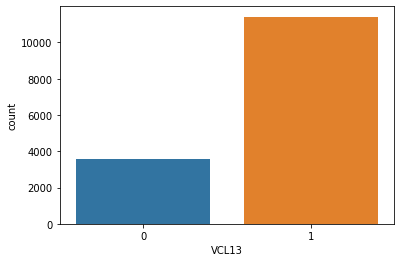

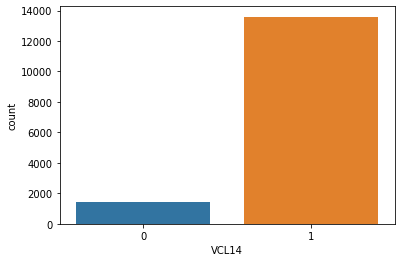

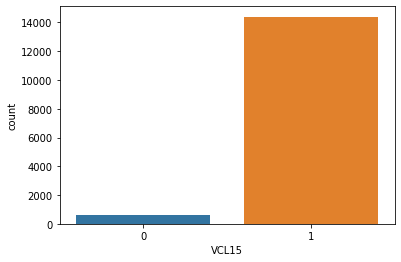

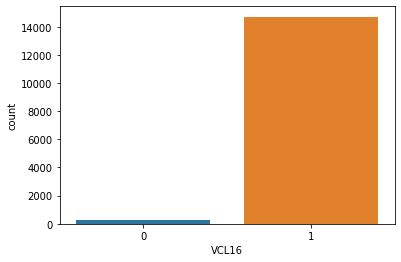

In [ ]:
for vcl in ['VCL' + str(num) for num in range(1, 17)]:
  sns.countplot(df[vcl])
  plt.show()

###### age, familysize 전처리

In [ ]:
df['age'] = df['age'].map(lambda x: min(100, x))
for age in range(0, 100, 10):
  df.loc[(age <= df['age']) & (df['age'] < age + 10), 'age'] = age // 10
  
df['familysize'] = df['familysize'].map(lambda x: min(10, x))

###### heatmap

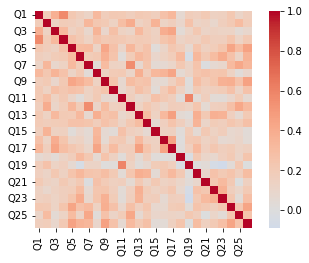

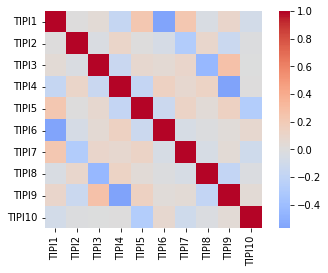

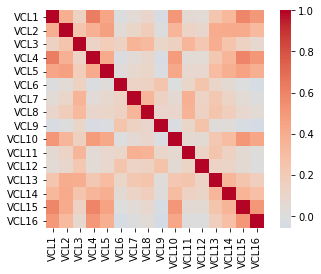

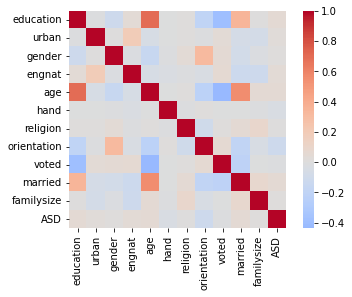

In [ ]:
for columns in [Q_columns, TIPI_columns, VCL_columns, info_columns]:
  sns.heatmap(df[columns].corr(method='spearman'), cmap="coolwarm", square=True, center=0)
  plt.show()

###### TEN-ITEM PERSONALITY INVENTORY-(TIPI)

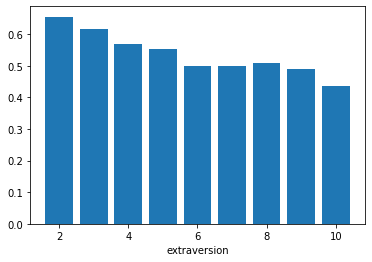

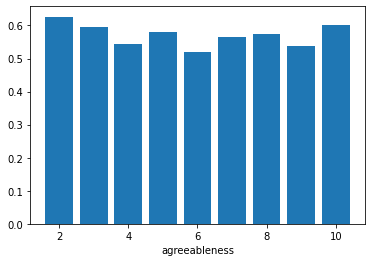

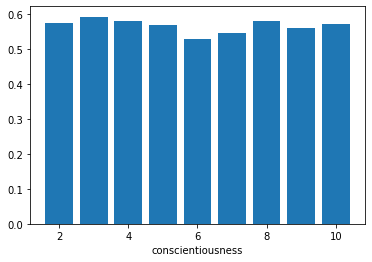

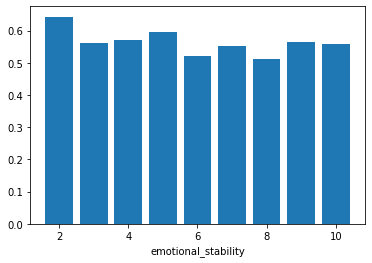

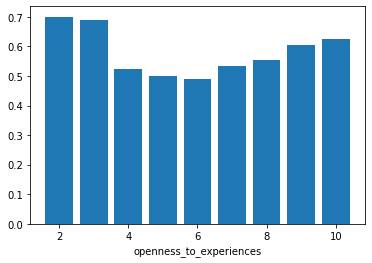

In [ ]:
temp = df.drop(TIPI_columns, axis=1)
temp['extraversion'] = df['TIPI1'] + 6 - df['TIPI6']
temp['agreeableness'] = 6 - df['TIPI2'] + df['TIPI7']
temp['conscientiousness'] = df['TIPI3'] + 6 - df['TIPI8']
temp['emotional_stability'] = 6 - df['TIPI4'] + df['TIPI9']
temp['openness_to_experiences'] = df['TIPI5'] + 6 - df['TIPI10']

for column in ['extraversion', 'agreeableness', 'conscientiousness', 'emotional_stability', 'openness_to_experiences']:
  data = temp.groupby(column)['nerdiness'].mean()
  plt.bar(x=range(2, 11), height=data)
  plt.xlabel(column)
  plt.show()

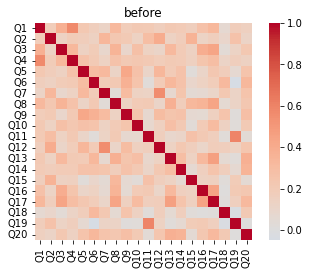

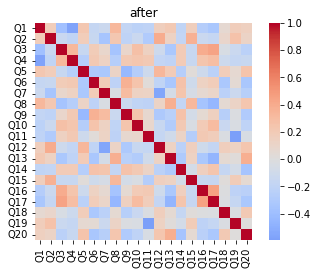

In [ ]:
MACH_columns = ['Q' + str(i) for i in range(1, 21)]
reordered = ['Q' + str(i) for i in [12, 11, 5, 3, 8, 15, 18, 19, 14, 2, 13, 6, 17, 4, 10, 16, 20, 1, 7, 9]]

df = pd.read_csv('train.csv')

sns.heatmap(df[MACH_columns].corr(method = 'spearman'), cmap="coolwarm", square=True, center=0)
plt.title('before')
plt.show()

will_flip = [3, 4, 6, 7, 9, 10, 11, 14, 16, 17]
for num in will_flip:
  df['Q' + str(num)] = 6 - df['Q' + str(num)]

sns.heatmap(df[MACH_columns].corr(method = 'spearman'), cmap="coolwarm", square=True, center=0)
plt.title('after')
plt.show()